In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
print("import successfully")

import successfully


In [2]:
# визуализация коэффициентов линейной регрессии
def visualize_coefficients(coefs, feature_names, top_n):
    """
    Функция для визуализации коэффициентов линейной регрессии.

    Параметры:
    -----------
        coefs: коэффициенты модели (model.coef_)
        feature_names: названия признаков (X_train.columns)
        top_n: вывести top_n самых положительных и top_n самых отрицательных признаков
    """
    feature_names = np.array(feature_names)
    if top_n * 2 > len(coefs):
        n_pos = len(coefs) // 2
        n_neg = len(coefs) - n_pos
    else:
        n_pos, n_neg = top_n, top_n
    # нам нужно найти индексы top_n наибольших и top_n наименьших коэффициентов
    min_coef_idxs = np.argsort(coefs)[:n_neg]
    max_coef_idxs = np.argsort(coefs)[len(coefs) - n_pos:]
    # соответствующие имена фичей
    top_feature_names = np.concatenate((feature_names[min_coef_idxs], feature_names[max_coef_idxs]))
    # отобразим на bar-графике
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.bar(np.arange(n_neg), coefs[min_coef_idxs], color=sns.xkcd_rgb['mauve'], hatch='/')
    ax.bar(np.arange(n_neg, n_neg + n_pos), coefs[max_coef_idxs], color=sns.xkcd_rgb['teal'], hatch='\\')
    ax.set_xticks(np.arange(0, n_neg + n_pos))
    ax.set_xticklabels(top_feature_names, rotation=45, ha="right", fontsize=14)
    plt.show()

In [3]:
df = pd.read_csv(r'data/tinkoff_legal_entities_new.csv', on_bad_lines="skip", encoding="utf_8", sep=",", index_col="id", parse_dates=["date"], dayfirst=True)

In [10]:
# df["ratings_avito_cnt"] = np.empty((len(df.index),))
# df["ratings_avito_cnt"] = np.nan
# df["ratings_avito_cnt"] = round(df["reviews_cnt_avito"] * reviews_cnt_to_ratings_cnt)
# df["ratings_avito_cnt"].replace(0, round(reviews_cnt_to_ratings_cnt), inplace=True)

# df["ratings_cnt_2gis"] = np.empty((len(df.index),))
# df["ratings_cnt_2gis"] = np.nan
# df["ratings_cnt_2gis"] = round(df["reviews_cnt_2gis"] * reviews_cnt_to_ratings_cnt)
# df["ratings_cnt_2gis"].replace(0, round(reviews_cnt_to_ratings_cnt), inplace=True)

# df["ratings_cnt_yell"] = np.empty((len(df.index),))
# df["ratings_cnt_yell"] = np.nan
# df["ratings_cnt_yell"] = round(df["reviews_cnt_yell"] * reviews_cnt_to_ratings_cnt)
# df["ratings_cnt_yell"].replace(0, round(reviews_cnt_to_ratings_cnt), inplace=True)

df["ratings_cnt_ya"].fillna(0, inplace=True)
df["reviews_cnt_yell"].fillna(0, inplace=True)
df["reviews_cnt_2gis"].fillna(0, inplace=True)
df["reviews_cnt_avito"].fillna(0, inplace=True)

df["rating_ya"].fillna(0, inplace=True)
df["rating_yell"].fillna(0, inplace=True)
df["rating_2gis"].fillna(0, inplace=True)
df["rating_avito"].fillna(0, inplace=True)
df["reviews_cnt"] = df["ratings_cnt_ya"] + df["reviews_cnt_2gis"] + df["reviews_cnt_yell"] + df["reviews_cnt_avito"]
df["reviews_cnt"].replace(0, 1, inplace=True)
df = df.dropna(subset=['ratings_cnt_ya', 'reviews_cnt_yell', "reviews_cnt_2gis", "reviews_cnt_avito"], how='all')

df["rating"] = (df["rating_ya"] * df["ratings_cnt_ya"] + df["rating_2gis"] * df["reviews_cnt_2gis"] + df["rating_yell"] * df["reviews_cnt_yell"] + df["rating_avito"] * df["reviews_cnt_avito"])\
                /df["reviews_cnt"]
df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)

df = df[(df["rating"] > 0) & (df["rating"] < 5)]



KeyError: 'ratings_cnt_ya'

## Рейтинг притензий от кредитов

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


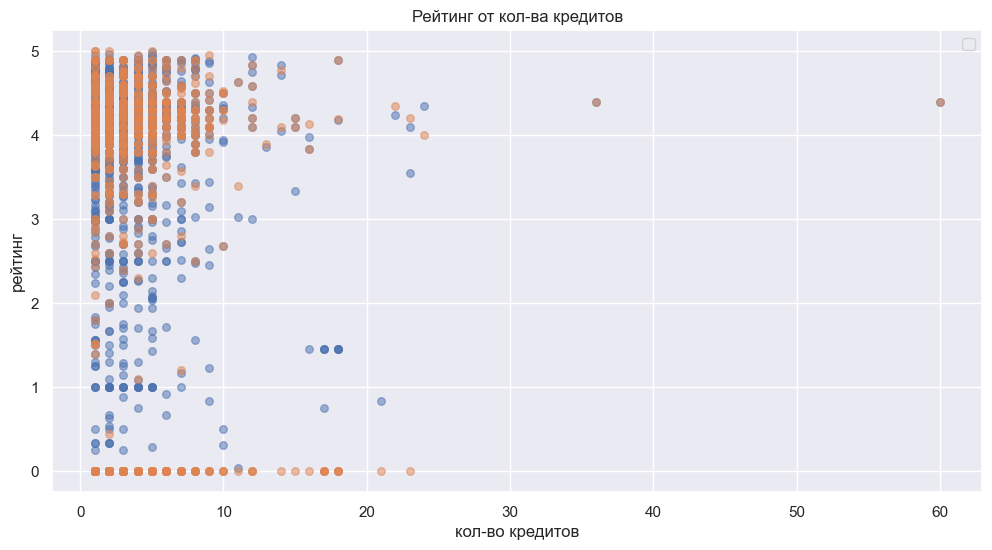

In [5]:
x = "appl_num"
y1 = "rating_ya"
y = "rating"

fig, ax = plt.subplots(1, 1,  figsize=(12, 6))

ax.scatter(df[x], df[y], s=30, alpha=0.5)
ax.scatter(df[x], df[y1], s=30, alpha=0.5)
ax.set_title("Рейтинг от кол-ва кредитов")
ax.set_xlabel("кол-во кредитов")
ax.set_ylabel("рейтинг")
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
# plt.xlim([-1, 30])
# plt.ylim([-10, 60])
plt.legend()
# plt.show()


## Нейронка

In [6]:
df["reviews_cnt_to_ratings_cnt"] = df["ratings_cnt_ya"] / df["reviews_cnt_ya"]
df["reviews_cnt_to_ratings_cnt"].replace([np.inf, -np.inf], np.nan, inplace=True)
df["reviews_cnt_to_ratings_cnt"].dropna()
reviews_cnt_to_ratings_cnt = df["reviews_cnt_to_ratings_cnt"].mean()
print(f"Среднее соотношение кол-ва обзоров к кол-ву оценок: {reviews_cnt_to_ratings_cnt}")
# print(df.info())

Среднее соотношение кол-ва обзоров к кол-ву оценок: 3.4113097341905703


In [7]:
except_1 = ["date", "rating_ya", "ratings_cnt_ya", "reviews_cnt_ya", "rating_yell", "reviews_cnt_yell", "rating_2gis", "reviews_cnt_2gis", "rating_avito", "reviews_cnt_avito"]
for i in except_1:
   df = df.drop(i, axis=1)


In [8]:
df1 = df.dropna()
# df1 = pd.DataFrame(df1.loc[:, ['total_case_cnt', "rating"]])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   phones_num                  0 non-null      int64  
 1   phb_fraud                   0 non-null      float64
 2   phb_dirty                   0 non-null      float64
 3   phb_all_bad                 0 non-null      float64
 4   phb_all                     0 non-null      float64
 5   phb_bad_perc                0 non-null      float64
 6   found_phones                0 non-null      float64
 7   phb_fraud_dir               0 non-null      float64
 8   phb_dirty_dir               0 non-null      float64
 9   phb_all_bad_dir             0 non-null      float64
 10  phb_all_dir                 0 non-null      float64
 11  phb_bad_perc_dir            0 non-null      float64
 12  found_phones_dir            0 non-null      float64
 13  claims_percent              0 non-null      float64


In [9]:
n = len(df1.index) // 3
train = df1.iloc[:n * 2, :]
val = df1.iloc[n * 2:n // 2 + n * 2, :]
test = df1.iloc[n // 2 + n * 2:, :]

y_train = train['rating']
X_train = train.drop('rating', axis=1)
y_test = test['rating']
X_test = test.drop('rating', axis=1).sort_values("total_case_cnt")
y_val = val['rating']
X_val = val.drop('rating', axis=1).sort_values("total_case_cnt")
# test_start = df.iloc[len(df["creation_date"]) // 2:, :].info()
# val_start = df.iloc[:len(df["creation_date"]) // 2, :].info()

model = Ridge(normalize=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'Test MSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
visualize_coefficients(model.coef_, X_train.columns, 10)

k = 27

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_val["total_case_cnt"][-14*k:], y_pred[-14*k:], color='r')
ax.plot(X_val["total_case_cnt"][-14*k:], y_val[-14*k:], color='b')

plt.xlabel("total_case_cnt")
plt.ylabel("rating")
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 26)) while a minimum of 1 is required by Ridge.